<a href="https://colab.research.google.com/github/Mahdi-Saadati/Basic-Machine-Learning/blob/main/11.c.%20K-Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

یکی از دیتاست‌های ساده و واقعی در scikit-learn، دیتاست مشتریان (Mall Customers Dataset) است که در آن اطلاعات مشتریان (سن، درآمد سالانه، امتیاز خرج‌کرد) وجود دارد.

این دیتاست مستقیماً در sklearn وجود ندارد، اما می‌توانیم آن را از طریق pandas بارگذاری کنیم. برای سادگی من نسخه‌ای کوچک و واقعی از این دیتاست را استفاده می‌کنم.

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        2
1           2   21                  15                      81        0
2           3   20                  16                       6        1
3           4   23                  16                      77        0
4           5   31                  17                      40        2
5           6   22                  17                      76        0
6           7   35                  18                       6        1
7           8   23                  18                      94        0
8           9   64                  19                       3        1
9          10   30                  19                      72        0


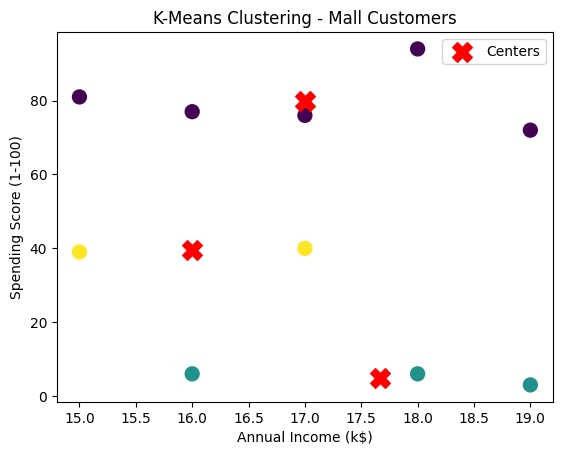

In [ ]:
# وارد کردن کتابخانه‌ها
import pandas as pd                     # برای کار با دیتافریم‌ها و مدیریت داده‌ها
import matplotlib.pyplot as plt         # برای رسم نمودارها
from sklearn.cluster import KMeans      # الگوریتم خوشه‌بندی KMeans

# تعریف دیتاست مشتریان (نمونه واقعی و پرکاربرد)
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],             # شناسه مشتری
    "Age": [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],          # سن مشتری
    "Annual Income (k$)": [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],  # درآمد سالیانه به هزار دلار
    "Spending Score (1-100)": [39, 81, 6, 77, 40, 76, 6, 94, 3, 72] # امتیاز خرج کردن مشتری
}
df = pd.DataFrame(data)  # تبدیل دیکشنری به دیتافریم pandas

# انتخاب ویژگی‌های مورد استفاده برای خوشه‌بندی
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# فقط ستون‌های درآمد سالیانه و امتیاز خرج کردن را انتخاب می‌کنیم، چون برای بخش‌بندی مشتریان مهم هستند

# تعریف و اجرای مدل KMeans با 3 خوشه
kmeans = KMeans(n_clusters=3, random_state=42)  # تعریف مدل با ۳ خوشه و ثابت کردن random_state برای تکرارپذیری
kmeans.fit(X)                                   # آموزش مدل روی داده‌های انتخاب شده
labels = kmeans.labels_                         # دریافت برچسب خوشه هر مشتری (۰، ۱ یا ۲)

# اضافه کردن برچسب خوشه‌ها به دیتافریم
df["Cluster"] = labels
print(df)  # نمایش دیتافریم با ستون جدید "Cluster"

# رسم نتایج خوشه‌بندی
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap="viridis", s=100)  # رسم داده‌ها با رنگ خوشه‌ها
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", marker="X", s=200, label="Centers")  # رسم مراکز خوشه با X قرمز بزرگ
plt.xlabel("Annual Income (k$)")      # برچسب محور X
plt.ylabel("Spending Score (1-100)")  # برچسب محور Y
plt.title("K-Means Clustering - Mall Customers")  # عنوان نمودار
plt.legend()                           # نمایش راهنما (Legend)
plt.show()                             # نمایش نمودار


<div dir="rtl" align="right">

🔹 خلاصه عملکرد کد:

دیتافریم مشتریان ساخته شد.

دو ویژگی کلیدی انتخاب شد: درآمد سالیانه و امتیاز خرج کردن.

الگوریتم KMeans با ۳ خوشه روی داده‌ها اجرا شد.

برچسب خوشه‌ها به دیتافریم اضافه شد.

داده‌ها و مراکز خوشه‌ها روی نمودار رسم شدند.